In [1]:
import uproot
import numpy as np
import pandas as pd
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplhep as hep
#hep.style.use("ATLAS")

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

import joblib

import seaborn as sns

In [2]:
# Chemin pour enregistrer les fichiers pickle.
datadir = "/home/chardong/y_identification/Venv/save_pkl/"
# Chemin pour save plots.
savedir = "/home/chardong/y_identification/Venv/save_plots/Py8_yj_jj_train_skim30/"
# Chemin pour load le dataset 'test' sur lequel le modéle BDT est testé + weight_test.
load_path = '/home/chardong/y_identification/Venv/save_pkl/Fudge_Factor/x_test_y_test_weight_test/'
# Chemin pour load BDT model.
savedirmodel = "/home/chardong/y_identification/Venv/BDT_model/"

In [3]:
# Loading BDT model 
model_skim30 = joblib.load(savedirmodel+"/skim30/LGBMClassifier_model_hard_no_loose_lr0.05_35_skim30.pkl")

# Load and make dataframe from pickles files of Pithia8 generator yj jj separate into 3 categories:
- noFF for shower-shape no Fudge-Factor
- Xplus for upper boundary of the shower-shape Fudge-Factor
- Xminus for bottom boundary of the shower-shape Fudge-Factor

Note that the name of the shower-shape variables is the same in each of these 3 categories to ensure that the BDT model (trained on shower-shape variables already Fudge) can be "read" these 3 datasets. 

In [4]:
# Dataset was skim about 5% of the original dataset to ensure functiunality of pandas.dataframe 
totald = pd.read_pickle(datadir + "RAW_data/Py8_yj_jj_mc16ade_pd122_train_w_skim_05.pkl")
totald_XnoFF = pd.read_pickle(datadir+"Fudge_Factor/Py8_yj_jj_mc16ade_pd122_train_w_skim_05_noFF.pkl")
totald_Xminus = pd.read_pickle(datadir+"Fudge_Factor/Py8_yj_jj_mc16ade_pd122_train_w_skim_05_FFminus.pkl")
totald_Xplus = pd.read_pickle(datadir+"Fudge_Factor/Py8_yj_jj_mc16ade_pd122_train_w_skim_05_FFplus.pkl")

### Load and make dataframe from pickles files of the test sample hard scattering process :

In [5]:
df_test_XnoFF_FF = pd.read_pickle(datadir+"df_test_sample_hard_scattering/Fudge_Factor/test_sample_hard_scattering_skim05_XnoFF_FF.pkl")
df_test_Xplus_FF = pd.read_pickle(datadir+"df_test_sample_hard_scattering/Fudge_Factor/test_sample_hard_scattering_skim05_Xplus_FF.pkl")
df_test_Xminus_FF = pd.read_pickle(datadir+"df_test_sample_hard_scattering/Fudge_Factor/test_sample_hard_scattering_skim05_Xminus_FF.pkl")

In [6]:
df_test_XnoFF = pd.read_pickle(datadir+"df_test_sample_hard_scattering/Fudge_Factor/test_sample_hard_scattering_skim05_XnoFF.pkl")
df_test_Xplus = pd.read_pickle(datadir+"df_test_sample_hard_scattering/Fudge_Factor/test_sample_hard_scattering_skim05_Xplus.pkl")
df_test_Xminus = pd.read_pickle(datadir+"df_test_sample_hard_scattering/Fudge_Factor/test_sample_hard_scattering_skim05_Xminus.pkl")

### Load and make dataframe from pickle file of the 'originel' test sample to compute signal and background efficiencies for "official" cut-based Tight selection:

In [7]:
df_test_sample_skim30 = pd.read_pickle(datadir+"df_test_sample_hard_scattering/df_test_sample_hard_scattering_skim30.pkl")

### Load and make dataframe from pickles files of the test sample x_test, y_test, weight_test :

- x_test: DataFrame containing the features of your test dataset. These features are the input variables used by the model to make predictions.
  
- y_test: DataFrame containing the truth labels and other associated information for your test dataset. These labels indicate the actual class of each event (signal or background).
  
- weight_test: series containing the weights associated with each event in your test dataset. These weights are used to adjust the importance of each event during the training and evaluation of the model, helping to compensate for class imbalances or other potential biases. 

In [8]:
# Charger DataFrames depuis fichiers pickle
x_test_XnoFF_FF = pd.read_pickle(load_path + 'x_test_XnoFF_FF.pkl')
y_test_XnoFF_FF = pd.read_pickle(load_path + 'y_test_XnoFF_FF.pkl')
weight_test_XnoFF_FF = pd.read_pickle(load_path + 'weight_test_XnoFF_FF.pkl')

x_test_XFFplus_FF = pd.read_pickle(load_path + 'x_test_XFFplus_FF.pkl')
y_test_XFFplus_FF = pd.read_pickle(load_path + 'y_test_XFFplus_FF.pkl')
weight_test_XFFplus_FF = pd.read_pickle(load_path + 'weight_test_XFFplus_FF.pkl')

x_test_XFFminus_FF = pd.read_pickle(load_path + 'x_test_XFFminus_FF.pkl')
y_test_XFFminus_FF = pd.read_pickle(load_path + 'y_test_XFFminus_FF.pkl')
weight_test_XFFminus_FF = pd.read_pickle(load_path + 'weight_test_XFFminus_FF.pkl')

### Load and make dataframe from pickles files of the test sample x_test, y_test, weight_test :
For those wich was separate with Function taking into account: X_noFF > or < X.model's performance is highly sensitive to the uncertainties in the shower shape variables.

In [9]:
# Charger DataFrames depuis fichiers pickle
x_test_XnoFF = pd.read_pickle(load_path + 'x_test_XnoFF.pkl')
y_test_XnoFF = pd.read_pickle(load_path + 'y_test_XnoFF.pkl')
weight_test_XnoFF = pd.read_pickle(load_path + 'weight_test_XnoFF.pkl')

x_test_XFFplus = pd.read_pickle(load_path + 'x_test_XFFplus.pkl')
y_test_XFFplus = pd.read_pickle(load_path + 'y_test_XFFplus.pkl')
weight_test_XFFplus = pd.read_pickle(load_path + 'weight_test_XFFplus.pkl')

x_test_XFFminus = pd.read_pickle(load_path + 'x_test_XFFminus.pkl')
y_test_XFFminus = pd.read_pickle(load_path + 'y_test_XFFminus.pkl')
weight_test_XFFminus = pd.read_pickle(load_path + 'weight_test_XFFminus.pkl')

### ROC curve

1) compute signal and background efficiencies for "official" cut-based Tight selection

In [10]:
s_tot = sum( df_test_sample_skim30[(df_test_sample_skim30["truth_label"] == 1)]["weight"] )
s_selected = sum( df_test_sample_skim30[(df_test_sample_skim30["truth_label"] == 1) & (df_test_sample_skim30['y_IsTight'].values)]["weight"] )
s_eff = s_selected / s_tot

b_tot = sum( df_test_sample_skim30[(df_test_sample_skim30["truth_label"] == 0)]["weight"] )
b_selected = sum( df_test_sample_skim30[(df_test_sample_skim30["truth_label"] == 0) & (df_test_sample_skim30['y_IsTight'].values)]["weight"] )
b_eff = b_selected / b_tot

2) Plot ROC curve of trained BDT with weighted events, compare to current cut-based Tight selection 

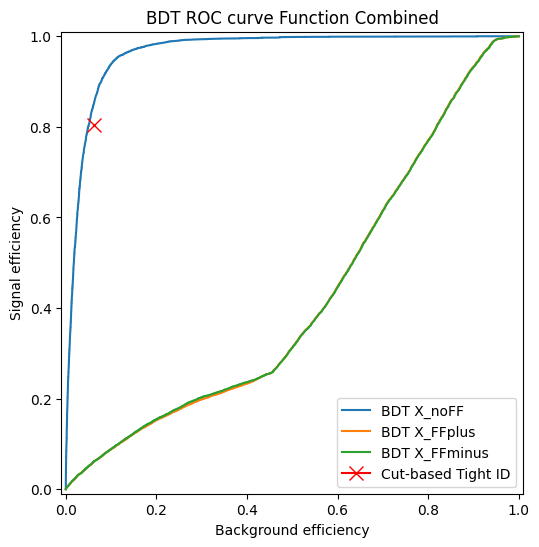

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

mod_disp = RocCurveDisplay.from_estimator(model_skim30, x_test_XnoFF, y_test_XnoFF, sample_weight=weight_test_XnoFF, 
                                          label="BDT X_noFF", ax=ax) 

mod_disp = RocCurveDisplay.from_estimator(model_skim30, x_test_XFFplus, y_test_XFFplus, sample_weight=weight_test_XFFplus, 
                                          label="BDT X_FFplus", ax=ax) 

mod_disp = RocCurveDisplay.from_estimator(model_skim30, x_test_XFFminus, y_test_XFFminus, sample_weight=weight_test_XFFminus, 
                                          label="BDT X_FFminus", ax=ax) 


plt.plot(b_eff, s_eff, marker="x", markersize=10, color="red", label = 'Cut-based Tight ID')

plt.xlabel('Background efficiency')
plt.ylabel('Signal efficiency')

#plt.xlim([0.0, 0.15])
#plt.ylim([0.65, 1.0])
#plt.title('BDT ROC curve - zoom')

plt.title('BDT ROC curve Function Combined')
plt.legend()

#plt.savefig(savedir+'ROC_lr_0.05_35_weight_skim05_XnoFF_XFFplus_XFFminus_Function_Combined.pdf')
plt.show()

## Increasing and decreasing the shower shape variables within their uncertainty ranges makes the signal and background less distinguishable.
- Model's performance is highly sensitive to the uncertainties in the shower shape variables ?
  
- The model might have learned the general patterns in the presence of uncertainties, but extreme adjustments in either direction could still lead to overlaps that degrade performance ?

- The upward and downward adjustments might push the signal and background distributions closer together, making it harder for the model to distinguish between them. This would naturally result in worse performance as seen in the ROC curves.

3) Plot ROC curve of trained BDT with weighted events, compare to current cut-based Tight selection WITHOUT taking into account the shift between X and X_noFF ( X < X_noFF or X > X_noFF)

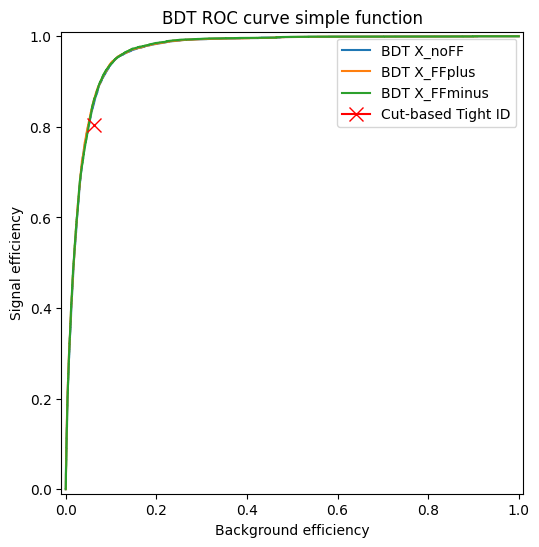

In [12]:
fig, ax = plt.subplots(figsize=(8,6))

mod_disp = RocCurveDisplay.from_estimator(model_skim30, x_test_XnoFF_FF, y_test_XnoFF_FF, sample_weight=weight_test_XnoFF_FF, 
                                          label="BDT X_noFF", ax=ax) 

mod_disp = RocCurveDisplay.from_estimator(model_skim30, x_test_XFFplus_FF, y_test_XFFplus_FF, sample_weight=weight_test_XFFplus_FF, 
                                          label="BDT X_FFplus", ax=ax) 

mod_disp = RocCurveDisplay.from_estimator(model_skim30, x_test_XFFminus_FF, y_test_XFFminus_FF, sample_weight=weight_test_XFFminus_FF, 
                                          label="BDT X_FFminus", ax=ax) 


plt.plot(b_eff, s_eff, marker="x", markersize=10, color="red", label = 'Cut-based Tight ID')

plt.xlabel('Background efficiency')
plt.ylabel('Signal efficiency')

#plt.xlim([0.0, 0.15])
#plt.ylim([0.65, 1.0])
#plt.title('BDT ROC curve - zoom')

plt.title('BDT ROC curve simple function')
plt.legend()

#plt.savefig(savedir+'ROC_lr_0.05_35_weight_skim05_XnoFF_XFFplus_XFFminus_Simple_Function.pdf')
plt.show()